In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Lecture 6: Summary Statistics

This week we will review of some statistics and probability theory needed for doing data analysis.

We begin with summary statistics. In short, summary statistics summarize and provide information about your *sample* data. They describe the overall charactertics of your dataset such as where the average lies and whether your data is skewed, etc. We usually describe the dataset in the following dimensions:

- a measure of location, or *central tendency*
- a measure of spread, or *dispersion*
- a measure of the shape of the distribution like *skewness*

In a way, how summary statistics characterize a dataset is similar to how Taylor's approximation characterizes a function. Breifly, central tendency is considered to be the first moment of data, dispersion is the second moment, skewness is the third moment, kurtosis is the fourth moment, etc.

First, let's do a quick survey on date-of-birth and month-of-birth of people in this class.

In [5]:
data = [
        (11, 9),
        (28, 3),
        (18, 9),
        (18, 9),
        (22, 7),
        (8, 11),
        (8, 9),
        (18, 7),
        (24, 12),
        (2, 8),
        (8, 12),
        (7, 12),
        (12, 6),
        (27, 9),
        (19, 10),
        (28, 5),
        (24, 11),
        (1, 12),
        (2, 7)
]

dob, mob = zip(*data)

## Central tendency

A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. As such, measures of central tendency are sometimes called measures of central location. The mean (often called the average) is most likely the measure of central tendency that you are most familiar with, but there are others, such as the median and the mode.

### Sample mean or average

Sample mean, or average of a dataset usually denoted by $\bar{x}$ and is given by:

$$\bar{x} = \frac{\sum_{i}^N x_i }{N}$$

It can be used with both discrete and continuous data, although its use is most often with continuous data.
Keep in mind that the sample mean is sensitive to **outliers**


In [6]:
# mean
dob_avg = sum(dob)/len(dob)
mob_avg = sum(mob)/len(mob)
print('dob_avg =', dob_avg)
print('mob_avg =', mob_avg)


# using numpy
print('dob_avg =', np.mean(dob))
print('mob_avg =', np.mean(mob))

dob_avg = 15.0
mob_avg = 8.842105263157896
dob_avg = 15.0
mob_avg = 8.842105263157896


### Median 

Median is the middle value of a dataset when it is sorted. If there are even numbers of items, take the average of the two middle ones. Unlike the sample mean, the median is less affected by outliers and skewed data.

In [7]:
# median
dob_med = np.median(dob)
mob_med = np.median(mob)
print('dob_med =', dob_med)
print('mob_med =', mob_med)

dob_med = 18.0
mob_med = 9.0


### Mode

The mode is the most frequent vaue in our dataset. On a histogram it represents the highest bar in a bar chart or histogram. You can, therefore, sometimes consider the mode as being the most popular option. It's common that we have multiple modes in a dataset.

In [8]:
from scipy import stats

?stats.mode

Signature: stats.mode(a, axis=0, nan_policy='propagate')
Docstring:
Return an array of the modal (most common) value in the passed array.

If there is more than one such value, only the smallest is returned.
The bin-count for the modal bins is also returned.

Parameters
----------
a : array_like
    n-dimensional array of which to find mode(s).
axis : int or None, optional
    Axis along which to operate. Default is 0. If None, compute over
    the whole array `a`.
nan_policy : {'propagate', 'raise', 'omit'}, optional
    Defines how to handle when input contains nan.
    The following options are available (default is 'propagate'):

      * 'propagate': returns nan
      * 'raise': throws an error
      * 'omit': performs the calculations ignoring nan values

Returns
-------
mode : ndarray
    Array of modal values.
count : ndarray
    Array of counts for each mode.

Examples
--------
>>> a = np.array([[6, 8, 3, 0],
...               [3, 2, 1, 7],
...               [8, 1, 8, 4],
...  

In [9]:
# mode
dob_mode = stats.mode(dob).mode
mob_mode = stats.mode(mob).mode
print('dob_mode=',dob_mode[0])
print('mob_mode=',mob_mode[0])

dob_mode= 8
mob_mode= 9


### Summary of when to use the mean, median and mode


| Type of Variable | Best measure of central tendency |
|------------------|----------------------------------|
|Categorical	|Mode |
|Ordinal	|Median |
|Interval/Ratio (not skewed)	|Mean |
|Interval/Ratio (skewed)	|Median |


## Dispersion

The term *Dispersion* refers to measures of how spread out our data is. A very simple statistics is `range` which is simply the difference between the minimum and the maximum values. Consider the following.

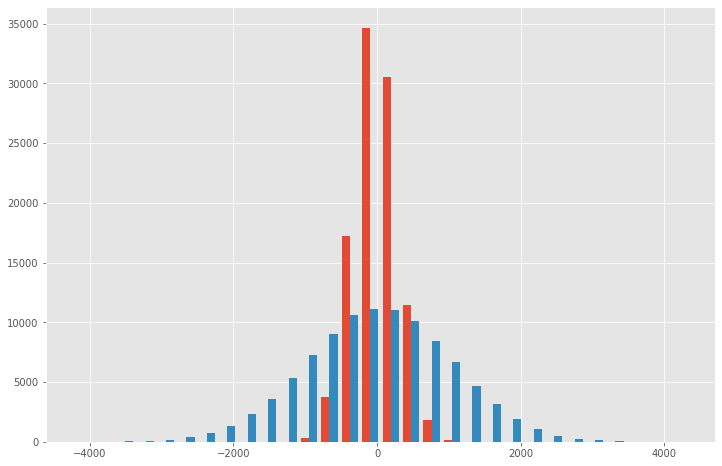

In [10]:
data1 = np.random.randn(100000,1)*300
data2 = np.random.randn(100000,1)*1000

plt.figure(figsize=(12,8))
_ = plt.hist(np.hstack([data1,data2]),bins=30)

### Range

The range is the difference between the highest and lowest values in a dataset and is the simplest measure of spread. So we calculate range as:

> Range = maximum value - minimum value


In [11]:
range_data1 = np.max(data1) - np.min(data1)
print("range of data1 = ", range_data1)

range_data2 = np.max(data2) - np.min(data2)
print("range of data2 = ", range_data2)

range of data1 =  2643.472197734399
range of data2 =  8533.86206778259


### Quartiles and interqurtile range

Quartiles tell us about the spread of a data set by breaking the data set into quarters, just like the median breaks it in half. 

> Interquartile range (IQR) = Q3 - Q1


In [12]:
iqr_data1 = np.percentile(data1,75) -  np.percentile(data1,25) 
print('IQR of data1=', iqr_data1)
iqr_data2 = np.percentile(data2,75) -  np.percentile(data2,25) 
print('IQR of data2=', iqr_data2)

IQR of data1= 404.4429418965067
IQR of data2= 1355.734914503002


### Variance and standard deviation

Another way to quantify spread is to measure the total amount of deviation from the mean:

$$\text{variance} = \frac{\sum_{i=1}^{N} ({x_i} - \bar{x})^2}{N} $$

$$\text{standard deviation} = \sqrt{\frac{\sum_{i=1}^{N} ({x_i} - \bar{x})^2}{N}} $$


In [13]:
var_data1 = np.var(data1)
var_data2 = np.var(data2)
print("variance of data1 = ", var_data1)
print("variance of data2 = ", var_data2)

std_data1 = np.std(data1)
std_data2 = np.std(data2)
print("sd of data1 = ", std_data1)
print("sd of data2 = ", std_data2)

variance of data1 =  89893.28197978633
variance of data2 =  1004285.0357006231
sd of data1 =  299.8220838760653
sd of data2 =  1002.1402275633002


## Histogram and other useful plots

Many times, it is not enough to look at just centers and spreads. We want to also look how the data is distributed. The histogram plot is very useful for describing a single dimension of the data.

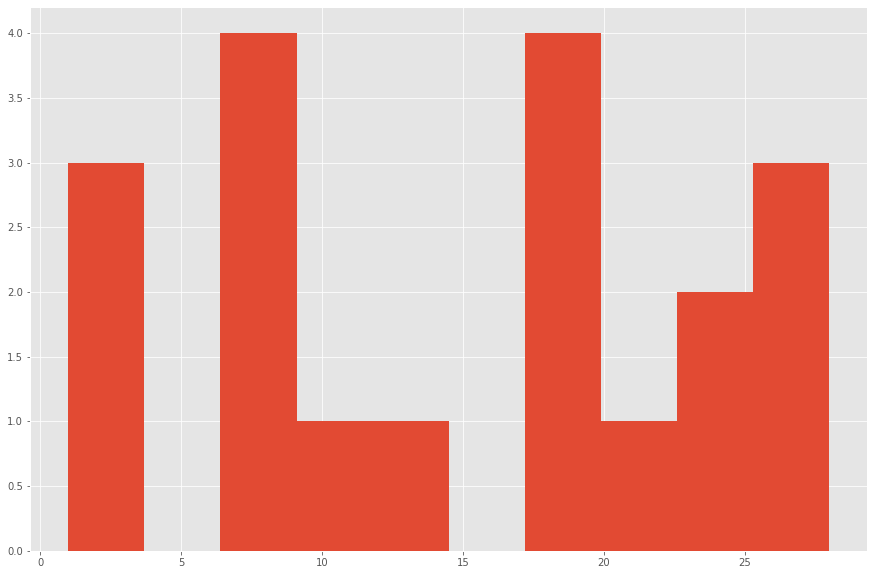

In [14]:
plt.figure(figsize=(15,10))
(n, bins, patches) = plt.hist(dob, bins=10)

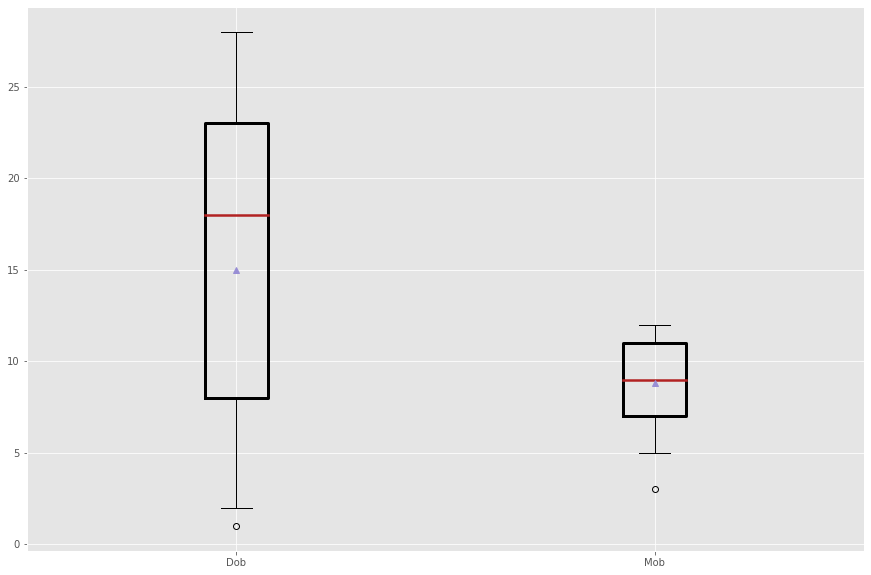

In [15]:
plt.figure(figsize=(15,10))
boxprops = dict(linestyle='-', linewidth=3)
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
bp =plt.boxplot([dob,mob],labels=['Dob','Mob'],showmeans=True, whis=[5,95], boxprops=boxprops,medianprops=medianprops)

## Covariance and correlation

Suppose you want to investigate relationship between two variables. Lets verify if dob and mob are somehow related. We will first check out the covariance between these two variables.

$$cov(X,Y) = \frac{\sum_{i=1}^N (x_i - \bar{x})(y_i - \bar{y})}{N}$$

Covariance indicates how two variables related. A positive covariance means the variables are positively related, while a negative covariance means the variables are negatively or inversely related.

In [16]:
np.cov(dob, mob)

array([[83.66666667, -8.55555556],
       [-8.55555556,  6.58479532]])

Covariance is difficult to interpret because of they are scale-dependent. It's more common to look at the Pearson correleation coefficient.

>The Pearson correlation coefficient measures the linear relationship between two datasets. Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

$$r(X,Y) = \frac{Cov(X,Y)}{S_X S_Y}$$

where $S_X$ and $S_Y$ are sample standard deviation of $X$ and $Y$ respectively.

In [17]:
(r,_) = stats.pearsonr(dob, mob)
r

-0.36450277776322965

Text(0, 0.5, 'Month')

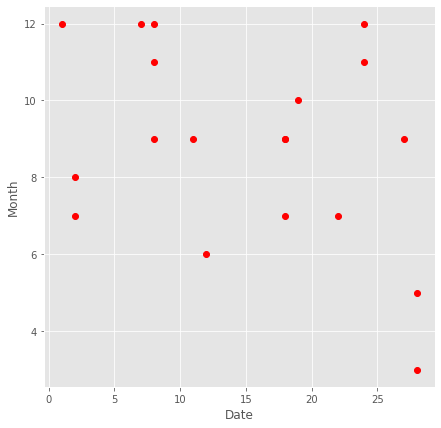

In [18]:
plt.figure(figsize=(7,7))
plt.plot(dob, mob, 'or')
plt.xlabel('Date')
plt.ylabel('Month')

#### Correlation and Causation

You have probably heard at some point that “correlation is not causation,” most likely by someone looking at data that posed a challenge to parts of his worldview that he was reluctant to question. Nonetheless, this is an important point—if x and y are strongly correlated, that might mean that x causes y, that y causes x, that each causes the other, that some third factor causes both, or it might mean nothing.

## Simpson's Paradox

One not uncommon surprise when analyzing data is Simpson’s Paradox, in which correlations can be misleading when **confounding** variables are ignored.

In [19]:
west_phd = np.random.randn(35,1)+3.1
east_phd = np.random.randn(70,1)+3.3
west_nonphd = np.random.randn(66,1)+10.9
east_nonphd = np.random.randn(33,1)+13.4

In [20]:
west = np.concatenate([west_phd, west_nonphd],axis=0)
east = np.concatenate([east_phd, east_nonphd],axis=0)

In [21]:
print("west",west.mean())
print("east",east.mean())

west 8.242512897766916
east 6.626024022299466


In [22]:
print("west phd",west_phd.mean())
print("east phd",east_phd.mean())
print("west nonphd",west_nonphd.mean())
print("east nonphd",east_nonphd.mean())

west phd 3.2977932325589454
east phd 3.3441481532634816
west nonphd 10.864712720225688
east nonphd 13.587578896012158


## Excercise:  Tripadvisor Reviews

Let's explore the following dataset:
https://archive.ics.uci.edu/ml/datasets/Travel+Reviews

Your tasks:
1. Download the dataset
1. Load it up as a dataframe with correct column names
1. Explore df.describe(), df.cov(), df.corr()
1. Create histograms of 'Average user feedback on restaurants' and 'Average user feedback on museums' (separately)
1. Create boxplots of ALL columns
1. Look for pairs of columns with **high** correlation (both positively and negatively)
1. Create 2D scatter plots of such pair

In [24]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00484/tripadvisor_review.csv

--2023-01-26 15:33:11--  https://archive.ics.uci.edu/ml/machine-learning-databases/00484/tripadvisor_review.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57307 (56K) [application/x-httpd-php]
Saving to: ‘tripadvisor_review.csv.1’

tripadvisor_review. 100%[===================>]  55.96K  38.6KB/s    in 1.4s    

2023-01-26 15:33:14 (38.6 KB/s) - ‘tripadvisor_review.csv.1’ saved [57307/57307]



In [25]:
!head tripadvisor_review.csv 

User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
User 1,0.93,1.8,2.29,0.62,0.8,2.42,3.19,2.79,1.82,2.42
User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.8,1.31,2.5
User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
User 6,0.99,1.28,0.72,0.27,0.74,1.26,3.17,2.89,1.66,3.66
User 7,0.9,1.36,0.26,0.32,0.86,1.58,3.17,2.66,1.22,3.22
User 8,0.74,1.4,0.22,0.41,0.82,1.5,3.17,2.81,1.54,2.88
User 9,1.12,1.76,1.04,0.64,0.82,2.14,3.18,2.79,1.41,2.54


In [26]:
df = pd.read_csv('tripadvisor_review.csv', names=[
    'UID',
    'art galleries',
    'dance clubs',
    'juice bars',
    'restaurants',
    'museums',
    'resorts',
    'parks/picnic spots',
    'beaches',
    'theaters',
    'religious institutions'],skiprows=1)

In [27]:
df.head()

,UID,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks/picnic spots,beaches,theaters,religious institutions
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [28]:
df.describe()

,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks/picnic spots,beaches,theaters,religious institutions
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


In [29]:
corr = df.corr() 

In [30]:
df.cov()

,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks/picnic spots,beaches,theaters,religious institutions
art galleries,0.106872,-0.029347,0.002220,0.006717,-0.014369,0.016605,-0.000032,0.000900,-0.005640,0.005327
dance clubs,-0.029347,0.228752,0.016440,0.017610,0.025028,0.038296,0.000412,-0.010433,0.012791,-0.010108
juice bars,0.002220,0.016440,0.621901,0.013485,0.097164,0.151657,0.004632,-0.018755,-0.024567,-0.111652
restaurants,0.006717,0.017610,0.013485,0.078250,0.012466,0.032580,0.000500,-0.003984,0.002720,-0.031727
museums,-0.014369,0.025028,0.097164,0.012466,0.191345,0.137194,0.000795,-0.001261,0.006650,-0.034790
resorts,0.016605,0.038296,0.151657,0.032580,0.137194,0.291101,0.001818,0.000005,0.018967,-0.075966
parks/picnic spots,-0.000032,0.000412,0.004632,0.000500,0.000795,0.001818,0.000061,-0.000078,0.000242,-0.001787
beaches,0.000900,-0.010433,-0.018755,-0.003984,-0.001261,0.000005,-0.000078,0.018908,0.008508,0.005069
theaters,-0.005640,0.012791,-0.024567,0.002720,0.006650,0.018967,0.000242,0.008508,0.132955,-0.005353
religious institutions,0.005327,-0.010108,-0.111652,-0.031727,-0.034790,-0.075966,-0.001787,0.005069,-0.005353,0.103285


<AxesSubplot:>

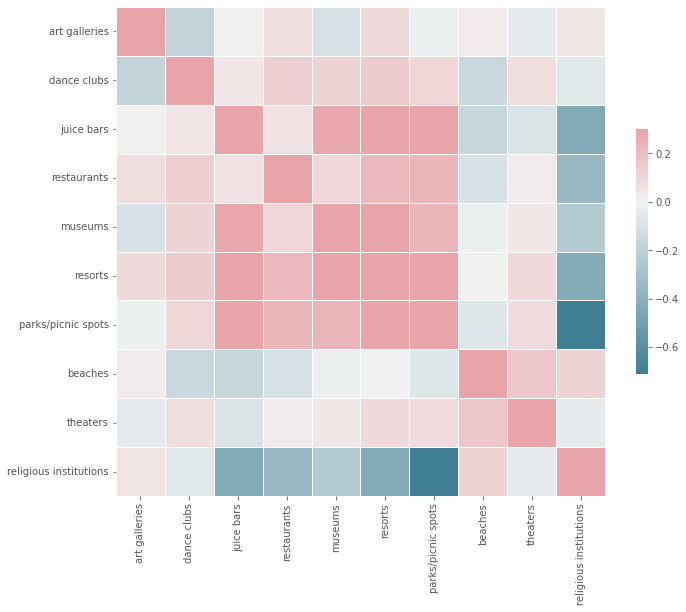

In [31]:
import seaborn as sns

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})